# Visualizing the Effects of Quantization Functions
In this notebook, we investigate how the quantization function transforms the points at each level.

In [1]:
import dataloader as dl
import model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pandas as pd

dataset_name = 'magic04'  # 10 features
num_layers = 4
varying_strength = 1

path_X, path_y = dl.get_path(dataset_name)
X, y = dl.read_dataset(path_X, path_y)

In [2]:
mask = dl.simulate_varying(X, varying_strength)
X = X * mask
qts = model.quant2(X, num_layers)

separate these points based on the feature spaces. For some datasets, there seems to be too many feature spaces, so pick one with larger number of instances and lower number of features to plot.

In [3]:
len(qts[0]), len(np.unique(qts[0], axis=0))  # row, feature space

(19019, 541)

In [4]:
split = {}

for i in range(len(qts[0])):
    key = ''.join([str(int(x)) for x in qts[0][i]])
    
    if key not in split: 
        split[key] = {k: [] for k in range(len(qts))}

    for j in range(len(qts)):
        split[key][j].append(qts[j][i])
        
        
spaces = list(split.keys())

/Users/copperwasp/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


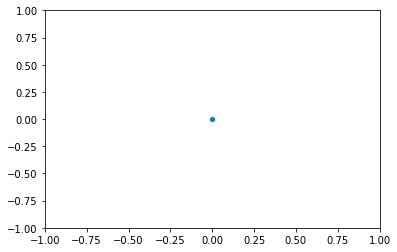

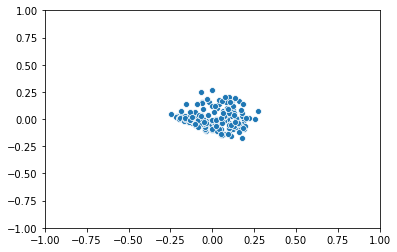

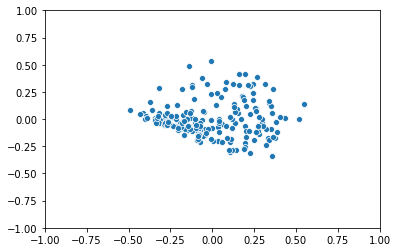

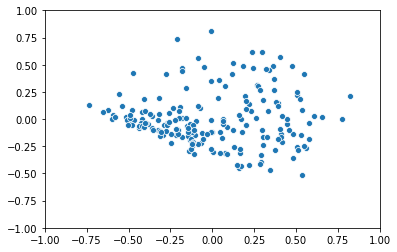

In [6]:
space_idx = 6

for i in range(len(qts)):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(split[spaces[space_idx]][i])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    sns.scatterplot(pca_result[:,0], pca_result[:,1], legend='full')
    plt.show()

We see that since the quantization function is linear, when we plot, the change only occurs in the ranges of axes, but pointwise distances are the same. Therefore, I don't think the higher layers provide too much information. Can we modify quant to handle this issue?

In [10]:
qts2 = model.quant(X, num_layers)
split = {}

for i in range(len(qts2[0])):
    key = ''.join([str(int(x)) for x in qts2[0][i]])
    
    if key not in split: 
        split[key] = {k: [] for k in range(len(qts2))}

    for j in range(len(qts2)):
        split[key][j].append(qts2[j][i])
        
        
spaces = list(split.keys())

/Users/copperwasp/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


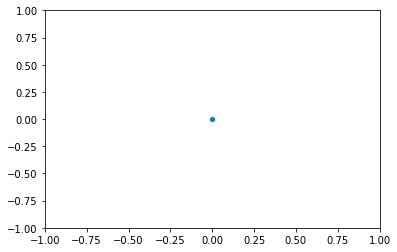

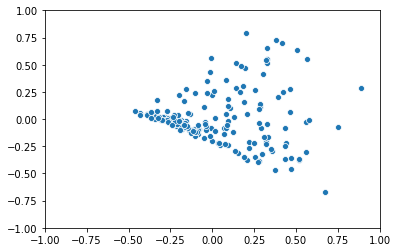

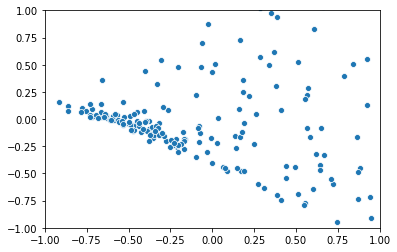

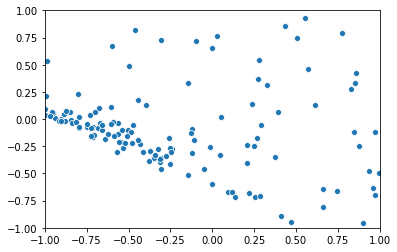

In [12]:
space_idx = 6

for i in range(len(qts2)):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(split[spaces[space_idx]][i])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    sns.scatterplot(pca_result[:,0], pca_result[:,1], legend='full')
    plt.show()